In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV, StratifiedKFold   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc, cohen_kappa_score
from itertools import cycle
from sklearn.model_selection import StratifiedKFold
import seaborn as sb

In [2]:
rcParams['figure.figsize'] = 12, 4

In [2]:
malware_data = pd.read_csv('LargeTrain.csv')
malware_data.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,3,3,583,15,5,1574,5,6,7,30,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,3,3,373,27,9,615,9,16,10,34,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,3,3,77,12,4,66,4,3,0,5,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1


In [24]:
malware_data.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
count,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,...,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000,10868.000000
mean,3.279076,3.500552,1990.713747,11.586861,4.934671,1264.397957,3.845786,16.559717,5.552908,31.011502,...,10840.809901,5067.437155,19206.655962,4861.557508,13055.646853,19358.439179,7070.320482,66860.996319,53866.402926,4.017851
std,0.936296,3.725526,5827.675688,8.986606,2.637995,3902.380905,2.925528,23.203308,7.285566,37.299279,...,18299.174269,4215.541706,23749.881264,4084.822497,10759.321012,24745.353583,5963.469543,66364.332846,53145.701929,2.684621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,58.000000,3.000000,4.000000,37.000000,1.000000,6.000000,0.000000,13.000000,...,1124.000000,1321.000000,3262.000000,1158.750000,3108.000000,3130.750000,1964.750000,11990.250000,7706.000000,2.000000
50%,3.000000,3.000000,513.000000,12.000000,4.000000,364.000000,4.000000,11.000000,4.000000,19.000000,...,5585.500000,5323.500000,14902.000000,5129.500000,14752.000000,14921.000000,7437.500000,62384.500000,45639.000000,3.000000
75%,3.000000,4.000000,1652.500000,18.000000,6.000000,1044.000000,5.000000,17.000000,9.000000,33.250000,...,8464.250000,6040.250000,22314.500000,6020.250000,16078.000000,21464.750000,8414.500000,73929.500000,68580.000000,6.000000
max,34.000000,263.000000,107775.000000,85.000000,58.000000,86560.000000,21.000000,377.000000,166.000000,492.000000,...,189297.000000,24914.000000,214551.000000,25502.000000,63895.000000,212548.000000,38582.000000,397109.000000,322765.000000,9.000000


In [25]:
malware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Columns: 1805 entries, Virtual to Class
dtypes: float64(583), int64(1222)
memory usage: 149.7 MB


In [3]:
train_df = malware_data
target = 'Class'
IDcol = 'loc'
predictors = [x for x in train_df.columns if x not in [target, IDcol]]

In [4]:
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(train_df[predictors], train_df[target])


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False)

In [5]:
my_scorer = metrics.make_scorer(metrics.f1_score, average="weighted")

In [6]:
param_test1 = {'n_estimators':range(20,201,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring=my_scorer,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[predictors],train_df[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.98685, std: 0.00213, params: {'n_estimators': 20},
  mean: 0.99048, std: 0.00199, params: {'n_estimators': 30},
  mean: 0.99318, std: 0.00170, params: {'n_estimators': 40},
  mean: 0.99428, std: 0.00104, params: {'n_estimators': 50},
  mean: 0.99474, std: 0.00126, params: {'n_estimators': 60},
  mean: 0.99456, std: 0.00115, params: {'n_estimators': 70},
  mean: 0.99511, std: 0.00113, params: {'n_estimators': 80},
  mean: 0.99511, std: 0.00110, params: {'n_estimators': 90},
  mean: 0.99521, std: 0.00126, params: {'n_estimators': 100},
  mean: 0.99548, std: 0.00115, params: {'n_estimators': 110},
  mean: 0.99576, std: 0.00099, params: {'n_estimators': 120},
  mean: 0.99576, std: 0.00122, params: {'n_estimators': 130},
  mean: 0.99566, std: 0.00104, params: {'n_estimators': 140},
  mean: 0.99576, std: 0.00099, params: {'n_estimators': 150},
  mean: 0.99586, std: 0.00120, params: {'n_estimators': 160},
  mean: 0.99586, std: 0.00120, params: {'n_estimators': 170},
  mean: 0.99586,

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


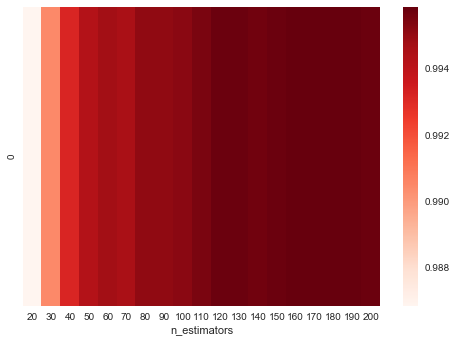

In [10]:
grid_visualization = []

for grid_pair in gsearch1.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (1, 19)
sb.heatmap(grid_visualization, cmap='Reds')
plt.xticks(np.arange(19) + 0.5, gsearch1.param_grid['n_estimators'])
plt.xlabel('n_estimators')

In [ ]:
param_test2 = {'max_depth':range(1,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=160, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring=my_scorer,n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df[predictors],train_df[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99232, std: 0.00181, params: {'min_samples_split': 200, 'max_depth': 1},
  mean: 0.99232, std: 0.00181, params: {'min_samples_split': 400, 'max_depth': 1},
  mean: 0.99232, std: 0.00181, params: {'min_samples_split': 600, 'max_depth': 1},
  mean: 0.99232, std: 0.00181, params: {'min_samples_split': 800, 'max_depth': 1},
  mean: 0.99232, std: 0.00181, params: {'min_samples_split': 1000, 'max_depth': 1},
  mean: 0.99530, std: 0.00107, params: {'min_samples_split': 200, 'max_depth': 3},
  mean: 0.99528, std: 0.00108, params: {'min_samples_split': 400, 'max_depth': 3},
  mean: 0.99511, std: 0.00119, params: {'min_samples_split': 600, 'max_depth': 3},
  mean: 0.99472, std: 0.00120, params: {'min_samples_split': 800, 'max_depth': 3},
  mean: 0.99509, std: 0.00129, params: {'min_samples_split': 1000, 'max_depth': 3},
  mean: 0.99567, std: 0.00149, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.99603, std: 0.00116, params: {'min_samples_split': 400, 'max_depth': 5},
  

In [4]:
grid_visualization = []

for grid_pair in gsearch2.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (8, 5)
sb.heatmap(grid_visualization, cmap='Greens')
plt.xticks(np.arange(5) + 0.5, gsearch2.param_grid['min_samples_split'])
plt.yticks(np.arange(8) + 0.5, gsearch2.param_grid['max_depth'][::])
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

NameError: name 'gsearch2' is not defined

In [7]:
param_test3 = {'min_samples_split':range(400,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=160, min_samples_split=400, max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring=my_scorer,n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_df[predictors],train_df[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99604, std: 0.00129, params: {'min_samples_split': 400, 'min_samples_leaf': 30},
  mean: 0.99594, std: 0.00130, params: {'min_samples_split': 600, 'min_samples_leaf': 30},
  mean: 0.99566, std: 0.00084, params: {'min_samples_split': 800, 'min_samples_leaf': 30},
  mean: 0.99595, std: 0.00114, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: 0.99595, std: 0.00099, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: 0.99612, std: 0.00090, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: 0.99557, std: 0.00136, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: 0.99538, std: 0.00078, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: 0.99538, std: 0.00124, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: 0.99586, std: 0.00125, params: {'min_samples_split': 400, 'min_samples_leaf': 40},
  mean: 0.99602, std: 0.00103, params: {'min_samples_split': 600, 'min_samples_leaf'

In [ ]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 9)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(9) + 0.5, grid_search.param_grid['min_samples_leaf'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['min_samples_split'][::])
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')